In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/OrangeVariety/Train'
valid_path = '/content/drive/MyDrive/OrangeVariety/Validation'

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [5]:
for layer in inception.layers:
    layer.trainable = False

In [7]:
folders = glob('/content/drive/MyDrive/OrangeVariety/Train/*')
print(folders)

['/content/drive/MyDrive/OrangeVariety/Train/GreenO', '/content/drive/MyDrive/OrangeVariety/Train/OrangeO']


In [8]:
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/OrangeVariety/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 208 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/OrangeVariety/Validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 90 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
13/13 [==============================] - 296s 23s/step - loss: 1.3220 - accuracy: 0.7718 - val_loss: 1.9921 - val_accuracy: 0.8333
Epoch 2/10
13/13 [==============================] - 14s 1s/step - loss: 0.8670 - accuracy: 0.8857 - val_loss: 0.8101 - val_accuracy: 0.9000
Epoch 3/10
13/13 [==============================] - 14s 1s/step - loss: 0.6540 - accuracy: 0.8880 - val_loss: 2.7371 - val_accuracy: 0.8111
Epoch 4/10
13/13 [==============================] - 14s 1s/step - loss: 0.6297 - accuracy: 0.9304 - val_loss: 3.2947 - val_accuracy: 0.8333
Epoch 5/10
13/13 [==============================] - 14s 1s/step - loss: 0.7166 - accuracy: 0.9218 - val_loss: 1.4078 - val_accuracy: 0.8667
Epoch 6/10
13/13 [==============================] - 14s 1s/step - loss: 0.1815 - accuracy: 0.9527 - val_loss: 0.9366 - val_accuracy: 0.9111
Epoch 7/10
13/13 [==============================] - 14s 1s/step - loss: 0.1972 - accuracy: 0.9680 - val_loss: 1.1354 - val_accuracy: 0.9222
Epoch 8/10
13/13 [

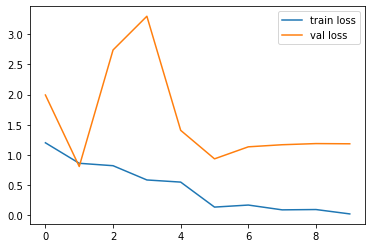

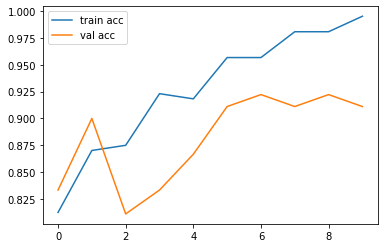

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossValidation_loss')

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccValidation_acc')

In [17]:
from tensorflow.keras.models import load_model

model.save('OVC.h5')